<a href="https://colab.research.google.com/github/miftakhulfiroh/data-analyst-GreatEdu-portfolio/blob/main/Final_Code_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Agri-food CO2 emission dataset - Forecasting ML**

Link Dataset di kaggel
https://www.kaggle.com/datasets/alessandrolobello/agri-food-co2-emission-dataset-forecasting-ml/data

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import xgboost as xgb
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pd.set_option('display.max_columns', None)
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Spectral')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

## Data Outline

# 1. Load Dataset
Agrofood_co2_emission.csv

In [ ]:
co2_df = pd.read_csv('Agrofood_co2_emission.csv')
co2_df

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,0.0000,79.0851,109.6446,14.2666,67.631366,691.7888,252.21419,11.997000,209.9778,260.1431,1590.5319,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,0.0000,80.4885,116.6789,11.4182,67.631366,710.8212,252.21419,12.853900,217.0388,268.6292,1657.2364,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,0.0000,80.7692,126.1721,9.2752,67.631366,743.6751,252.21419,13.492900,222.1156,264.7898,1653.5068,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,0.0000,85.0678,81.4607,9.0635,67.631366,791.9246,252.21419,14.055900,201.2057,261.7221,1642.9623,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,0.0000,88.8058,90.4008,8.3962,67.631366,831.9181,252.21419,15.126900,182.2905,267.6219,1689.3593,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.910800,1077.2392,317.07440,2585.080847,858.9820,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.985700,1093.3441,332.77590,1227.240253,889.4250,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.057000,1108.5523,348.51070,1127.687805,966.2650,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.951400,1121.3255,327.82090,2485.528399,945.9420,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [ ]:
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

In [ ]:
duplicate_rows = co2_df[co2_df.duplicated()]
print("Data Duplikat:")
print(duplicate_rows)
print("Jumlah Data Duplikat:", len(duplicate_rows))

Data Duplikat:
Empty DataFrame
Columns: [Area, Year, Savanna fires, Forest fires, Crop Residues, Rice Cultivation, Drained organic soils (CO2), Pesticides Manufacturing, Food Transport, Forestland, Net Forest conversion, Food Household Consumption, Food Retail, On-farm Electricity Use, Food Packaging, Agrifood Systems Waste Disposal, Food Processing, Fertilizers Manufacturing, IPPU, Manure applied to Soils, Manure left on Pasture, Manure Management, Fires in organic soils, Fires in humid tropical forests, On-farm energy use, Rural population, Urban population, Total Population - Male, Total Population - Female, total_emission, Average Temperature °C]
Index: []
Jumlah Data Duplikat: 0


In [ ]:
print(co2_df.isnull().sum().sort_values(ascending=False))

Crop Residues                      1389
On-farm energy use                  956
Manure applied to Soils             928
Manure Management                   928
IPPU                                743
Net Forest conversion               493
Forestland                          493
Food Household Consumption          473
Fires in humid tropical forests     155
Forest fires                         93
Savanna fires                        31
Total Population - Male               0
Urban population                      0
Total Population - Female             0
total_emission                        0
Rural population                      0
Fires in organic soils                0
Manure left on Pasture                0
Area                                  0
Agrifood Systems Waste Disposal       0
Fertilizers Manufacturing             0
Food Processing                       0
Year                                  0
Food Packaging                        0
On-farm Electricity Use               0


In [ ]:
mean_Crop_Residues = co2_df['Crop Residues'].mean()
co2_df['Crop Residues'].fillna(mean_Crop_Residues, inplace=True)

mean_energy = co2_df['On-farm energy use'].mean()
co2_df['On-farm energy use'].fillna(mean_energy, inplace=True)

mean_Soils = co2_df['Manure applied to Soils'].mean()
co2_df['Manure applied to Soils'].fillna(mean_Soils, inplace=True)

mean_Management = co2_df['Manure Management'].mean()
co2_df['Manure Management'].fillna(mean_Management, inplace=True)

mean_IPPU = co2_df['IPPU'].mean()
co2_df['IPPU'].fillna(mean_IPPU, inplace=True)

mean_Net = co2_df['Net Forest conversion'].mean()
co2_df['Net Forest conversion'].fillna(mean_Net, inplace=True)

mean_Forestland = co2_df['Forestland'].mean()
co2_df['Forestland'].fillna(mean_Forestland, inplace=True)

mean_Food = co2_df['Food Household Consumption'].mean()
co2_df['Food Household Consumption'].fillna(mean_Food, inplace=True)

mean_Humid = co2_df['Fires in humid tropical forests'].mean()
co2_df['Fires in humid tropical forests'].fillna(mean_Humid, inplace=True)

mean_Forest = co2_df['Forest fires'].mean()
co2_df['Forest fires'].fillna(mean_Forest, inplace=True)

mean_Savanna = co2_df['Savanna fires'].mean()
co2_df['Savanna fires'].fillna(mean_Savanna, inplace=True)

print(co2_df)

             Area  Year  Savanna fires  Forest fires  Crop Residues  \
0     Afghanistan  1990        14.7237        0.0557       205.6077   
1     Afghanistan  1991        14.7237        0.0557       209.4971   
2     Afghanistan  1992        14.7237        0.0557       196.5341   
3     Afghanistan  1993        14.7237        0.0557       230.8175   
4     Afghanistan  1994        14.7237        0.0557       242.0494   
...           ...   ...            ...           ...            ...   
6960     Zimbabwe  2016      1190.0089      232.5068        70.9451   
6961     Zimbabwe  2017      1431.1407      131.1324       108.6262   
6962     Zimbabwe  2018      1557.5830      221.6222       109.9835   
6963     Zimbabwe  2019      1591.6049      171.0262        45.4574   
6964     Zimbabwe  2020       481.9027       48.4197       108.3022   

      Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0             686.0000                          0.0               

In [ ]:
print(co2_df.isnull().sum().sort_values(ascending=False))

Area                               0
Food Processing                    0
total_emission                     0
Total Population - Female          0
Total Population - Male            0
Urban population                   0
Rural population                   0
On-farm energy use                 0
Fires in humid tropical forests    0
Fires in organic soils             0
Manure Management                  0
Manure left on Pasture             0
Manure applied to Soils            0
IPPU                               0
Fertilizers Manufacturing          0
Agrifood Systems Waste Disposal    0
Year                               0
Food Packaging                     0
On-farm Electricity Use            0
Food Retail                        0
Food Household Consumption         0
Net Forest conversion              0
Forestland                         0
Food Transport                     0
Pesticides Manufacturing           0
Drained organic soils (CO2)        0
Rice Cultivation                   0
C

In [ ]:
co2_df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,0.0,79.0851,109.6446,14.2666,67.631366,691.7888,252.21419,11.9970,209.9778,260.1431,1590.5319,319.1763,0.0,0.0,3008.982252,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,0.0,80.4885,116.6789,11.4182,67.631366,710.8212,252.21419,12.8539,217.0388,268.6292,1657.2364,342.3079,0.0,0.0,3008.982252,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,0.0,80.7692,126.1721,9.2752,67.631366,743.6751,252.21419,13.4929,222.1156,264.7898,1653.5068,349.1224,0.0,0.0,3008.982252,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,0.0,85.0678,81.4607,9.0635,67.631366,791.9246,252.21419,14.0559,201.2057,261.7221,1642.9623,352.2947,0.0,0.0,3008.982252,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,0.0,88.8058,90.4008,8.3962,67.631366,831.9181,252.21419,15.1269,182.2905,267.6219,1689.3593,367.6784,0.0,0.0,3008.982252,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [ ]:
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6965 non-null   float64
 3   Forest fires                     6965 non-null   float64
 4   Crop Residues                    6965 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6965 non-null   float64
 10  Net Forest conversion            6965 non-null   float64
 11  Food Household Consumption       6965 non-null   float64
 12  Food Retail         

In [ ]:
co2_df.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
count,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6.965000e+03,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6.965000e+03,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000
mean,2005.124910,1188.390893,919.302167,998.706309,4259.666673,3503.228636,333.418393,1939.581760,-17828.285678,1.760564e+04,4847.580384,2043.210539,1626.681460,1658.629808,6018.444633,3872.724461,3035.723356,1.999150e+04,923.225603,3518.026573,2263.344946,1210.315532,668.452931,3008.982252,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989
std,8.894665,5234.597927,3695.155566,3310.818022,17613.825187,15861.445678,1429.159367,5616.748808,78882.488294,9.751121e+04,24897.935876,8494.249260,9343.182193,11481.343725,22156.742542,19838.216846,11693.029064,1.053094e+05,3004.298828,9103.556202,7429.808959,22669.847760,3228.341292,11738.409960,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.340000,0.000100,0.001900,0.000000e+00,0.049000,0.000700,0.432900,0.000000,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,1997.000000,0.000000,0.000000,25.360100,181.260800,0.000000,6.000000,27.958600,-5960.829600,0.000000e+00,13.797400,26.818500,8.037600,67.631366,86.680500,209.587728,360.358799,5.193070e+01,23.119500,139.669900,52.707800,0.000000,0.000000,17.738200,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333
50%,2005.000000,1.690800,0.646500,193.083100,534.817400,0.000000,13.000000,204.962800,-128.411600,1.259940e+02,223.149000,172.042600,29.120700,74.018133,901.275700,344.760200,1115.052400,1.338400e+03,189.282900,972.567400,427.217100,0.000000,0.000000,282.527900,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300
75%,2013.000000,122.685600,78.057200,998.706309,1536.640000,690.408800,116.325487,1207.000900,0.000000,9.877472e+03,2362.654300,1075.999100,499.944700,281.791000,3006.442100,1236.913400,2024.869900,1.448474e+04,923.225603,2430.792600,2263.344946,0.000000,20.284300,3008.982252,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,466288.200700,133784.065300,165676.299000,175741.306100,213289.701600,274253.512500,170826.423300,1.861641e+06,34677.360300,92630.756800,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


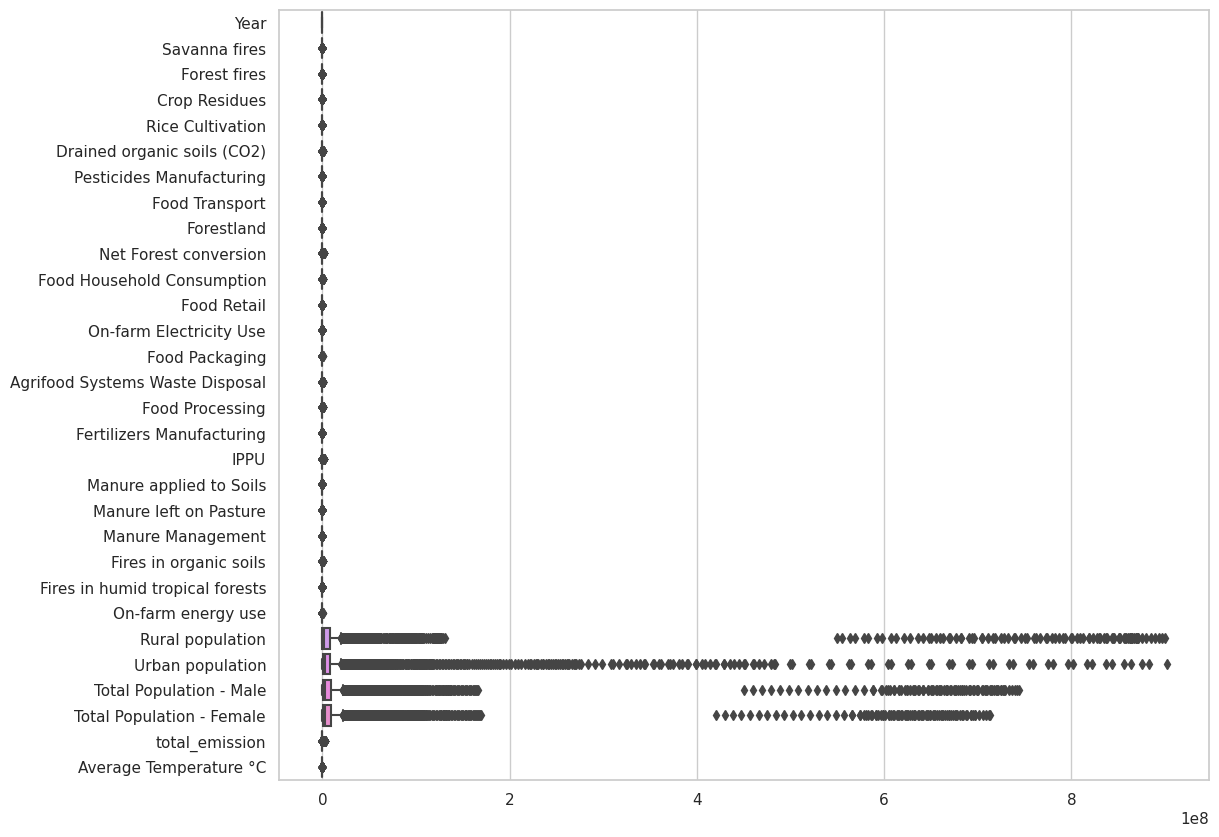

In [ ]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=co2_df, orient="h")
plt.show()

In [ ]:
def remove_outliers(co2_df, atribut, threshold=1.5):

    q1 = co2_df[atribut].quantile(0.25)
    q3 = co2_df[atribut].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - (threshold * iqr)
    upper_bound = q3 + (threshold * iqr)

    data_no_outliers = co2_df[(co2_df[atribut] >= lower_bound) & (co2_df[atribut] <= upper_bound)]

    return data_no_outliers

co2_df = remove_outliers(co2_df, 'Savanna fires')
co2_df = remove_outliers(co2_df, 'Forest fires')
co2_df = remove_outliers(co2_df, 'Crop Residues')
co2_df = remove_outliers(co2_df, 'Rice Cultivation')
co2_df = remove_outliers(co2_df, 'Drained organic soils (CO2)')
co2_df = remove_outliers(co2_df, 'Pesticides Manufacturing')
co2_df = remove_outliers(co2_df, 'Food Transport')
co2_df = remove_outliers(co2_df, 'Forestland')
co2_df = remove_outliers(co2_df, 'Net Forest conversion')
co2_df = remove_outliers(co2_df, 'Food Household Consumption')
co2_df = remove_outliers(co2_df, 'Food Retail')
co2_df = remove_outliers(co2_df, 'On-farm Electricity Use')
co2_df = remove_outliers(co2_df, 'Food Packaging')
co2_df = remove_outliers(co2_df, 'Agrifood Systems Waste Disposal')
co2_df = remove_outliers(co2_df, 'Food Processing')
co2_df = remove_outliers(co2_df, 'Fertilizers Manufacturing')
co2_df = remove_outliers(co2_df, 'IPPU')
co2_df = remove_outliers(co2_df, 'Manure applied to Soils')
co2_df = remove_outliers(co2_df, 'Manure left on Pasture')
co2_df = remove_outliers(co2_df, 'Manure Management')
co2_df = remove_outliers(co2_df, 'Fires in organic soils')
co2_df = remove_outliers(co2_df, 'Fires in humid tropical forests')
co2_df = remove_outliers(co2_df, 'On-farm energy use')
co2_df = remove_outliers(co2_df, 'Rural population')
co2_df = remove_outliers(co2_df, 'Urban population')
co2_df = remove_outliers(co2_df, 'Total Population - Male')
co2_df = remove_outliers(co2_df, 'Total Population - Female')
co2_df = remove_outliers(co2_df, 'total_emission')
co2_df = remove_outliers(co2_df, 'Average Temperature °C')

In [ ]:
# Menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga) untuk setiap kolom
q1 = co2_df.quantile(0.25)
q3 = co2_df.quantile(0.75)

# Menghitung IQR (Interquartile Range) untuk setiap kolom
iqr = q3 - q1

# Menentukan ambang batas untuk outlier (biasanya 1.5 kali IQR di atas Q3 atau di bawah Q1)
threshold = 1.5

# Mendeteksi outlier berdasarkan ambang batas dalam setiap kolom
outliers = co2_df[((co2_df < (q1 - threshold * iqr)) | (co2_df > (q3 + threshold * iqr)))]
print("Outliers:")
print(outliers)

Outliers:
     Area  Year  Savanna fires  Forest fires  Crop Residues  Rice Cultivation  \
97    NaN   NaN            NaN           NaN            NaN               NaN   
98    NaN   NaN            NaN           NaN            NaN               NaN   
99    NaN   NaN            NaN           NaN            NaN               NaN   
100   NaN   NaN            NaN           NaN            NaN               NaN   
101   NaN   NaN            NaN           NaN            NaN               NaN   
...   ...   ...            ...           ...            ...               ...   
6433  NaN   NaN            NaN           NaN            NaN               NaN   
6434  NaN   NaN            NaN           NaN            NaN               NaN   
6435  NaN   NaN            NaN           NaN            NaN               NaN   
6436  NaN   NaN            NaN           NaN            NaN               NaN   
6437  NaN   NaN            NaN           NaN            NaN               NaN   

      Drained org

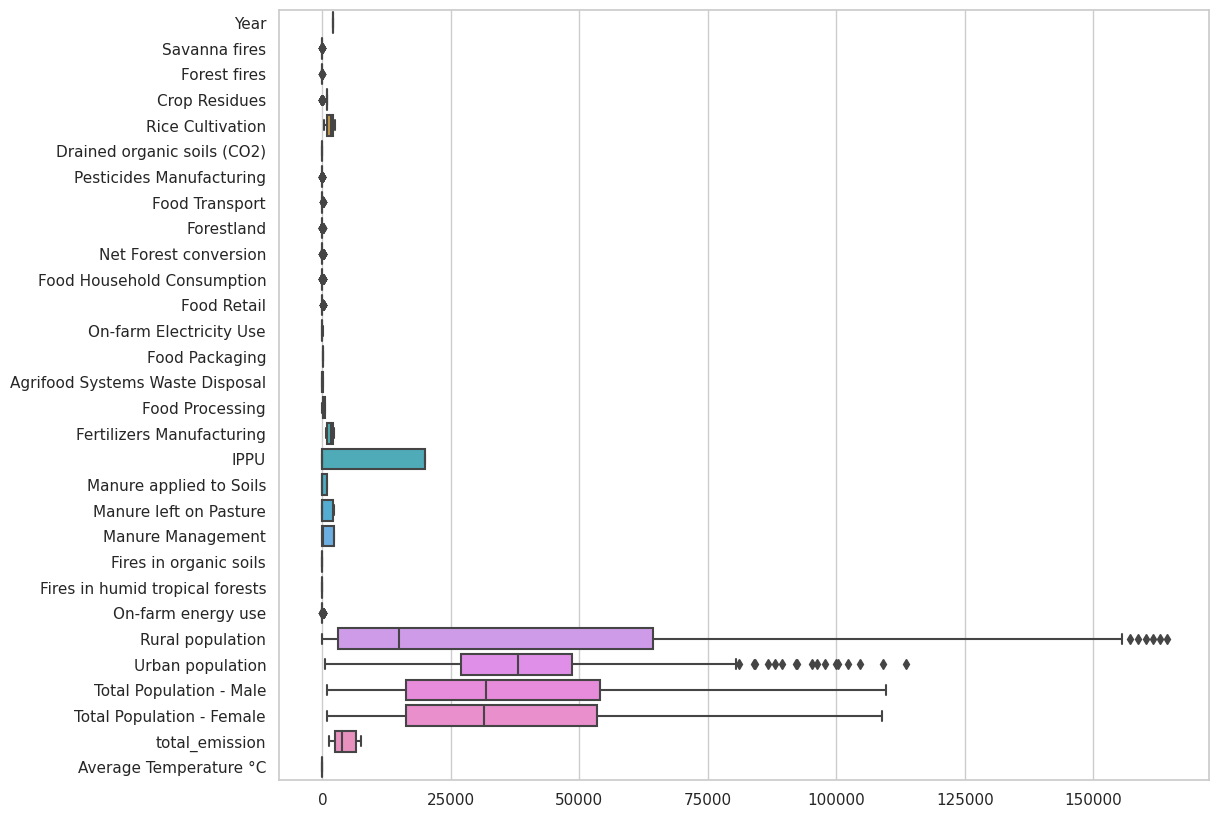

In [ ]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=co2_df, orient="h")
plt.show()

<Axes: xlabel='total_emission', ylabel='Count'>

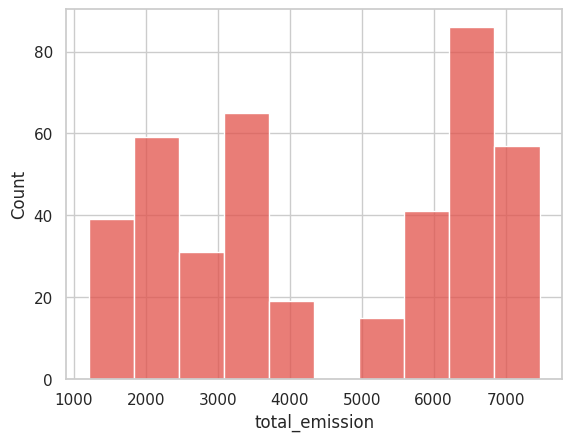

In [ ]:
sns.histplot(co2_df['total_emission'])

<Axes: xlabel='Rural population', ylabel='Count'>

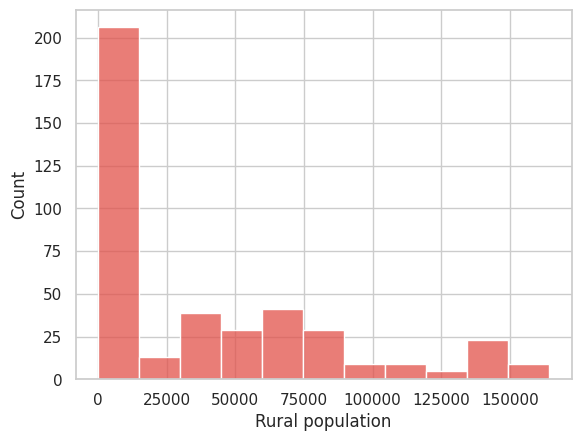

In [ ]:
sns.histplot(co2_df['Rural population'])

<Axes: xlabel='Urban population', ylabel='Count'>

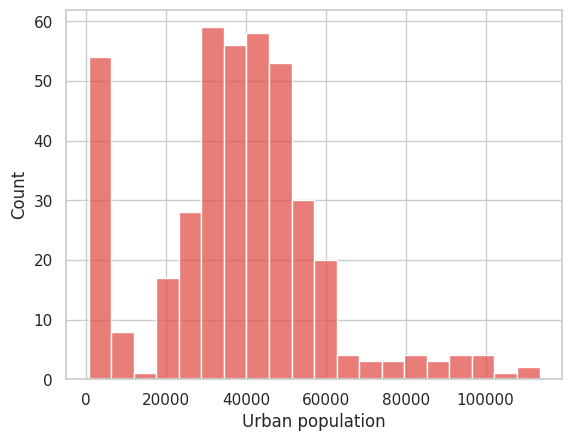

In [ ]:
sns.histplot(co2_df['Urban population'])

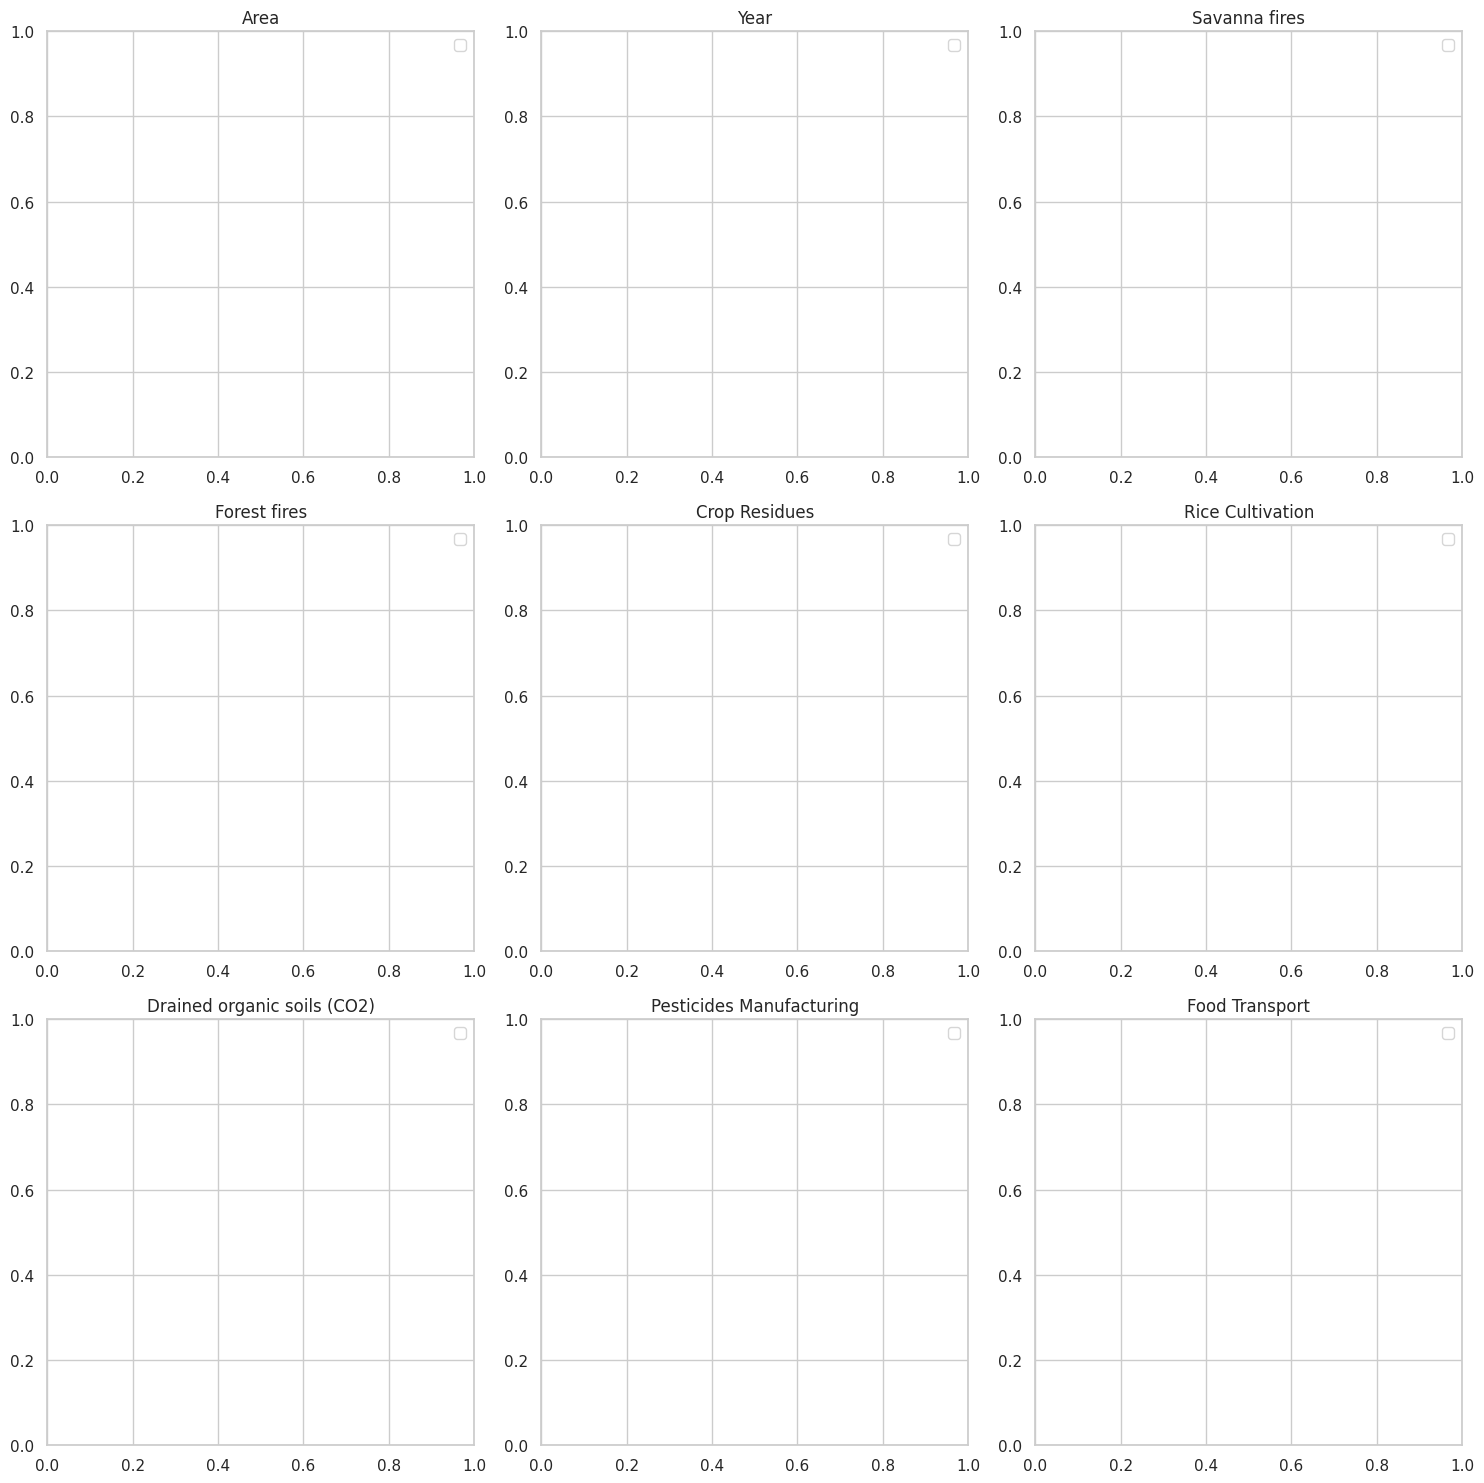

In [ ]:
non_potable = co2_df.query("total_emission == 0")
potable = co2_df.query("total_emission == 1")

plt.figure(figsize = (15,15))
for ax, col in enumerate(co2_df.columns[:9]):
    plt.subplot(3,3, ax+1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend()
plt.tight_layout()

In [ ]:
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412 entries, 97 to 6437
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             412 non-null    object 
 1   Year                             412 non-null    int64  
 2   Savanna fires                    412 non-null    float64
 3   Forest fires                     412 non-null    float64
 4   Crop Residues                    412 non-null    float64
 5   Rice Cultivation                 412 non-null    float64
 6   Drained organic soils (CO2)      412 non-null    float64
 7   Pesticides Manufacturing         412 non-null    float64
 8   Food Transport                   412 non-null    float64
 9   Forestland                       412 non-null    float64
 10  Net Forest conversion            412 non-null    float64
 11  Food Household Consumption       412 non-null    float64
 12  Food Retail         

In [ ]:
co2_df

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
97,American Samoa,1994,0.0,0.0,998.706309,926.342278,0.0,11.481085,16.2396,-58.8991,7.9612,0.5104,7.9598,17.004663,77.393651,1.8635,88.230200,2005.792129,19991.498031,923.225603,2148.251693,2263.344946,0.0,0.0,38.6828,8037.0,43766.0,26750.0,25539.0,5288.813899,0.167917
98,American Samoa,1995,0.0,0.0,998.706309,926.342278,0.0,11.481085,15.5796,-58.8991,7.9612,0.5104,7.4803,17.004663,77.393651,1.9014,82.476200,2005.792129,19991.498031,923.225603,2148.251693,2263.344946,0.0,0.0,36.2348,7782.0,45086.0,27298.0,26103.0,5279.510299,0.770000
99,American Samoa,1996,0.0,0.0,998.706309,926.342278,0.0,11.481085,15.5340,-58.8991,7.9612,0.5104,7.3365,17.004663,77.393651,1.9389,81.517100,2005.792129,19991.498031,923.225603,2148.251693,2263.344946,0.0,0.0,35.8632,7527.0,46402.0,27837.0,26663.0,5278.027699,0.809417
100,American Samoa,1997,0.0,0.0,998.706309,926.342278,0.0,11.481085,15.7413,-58.8991,7.9612,0.5104,7.5763,17.004663,77.393651,1.9754,84.074600,2005.792129,19991.498031,923.225603,2148.251693,2263.344946,0.0,0.0,36.9279,7268.0,47673.0,28368.0,27209.0,5282.133499,0.353000
101,American Samoa,1998,0.0,0.0,998.706309,926.342278,0.0,11.481085,15.6022,-58.8991,7.9612,0.5104,7.4324,17.004663,77.393651,2.0094,82.795700,2005.792129,19991.498031,923.225603,2148.251693,2263.344946,0.0,0.0,36.5827,7006.0,48895.0,28874.0,27730.0,5280.260399,0.892000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6433,Tuvalu,2016,0.0,0.0,998.706309,2005.210414,0.0,11.481085,0.3171,-0.1997,0.0000,0.3859,0.3764,17.004663,67.631366,3.6349,209.587728,860.092165,0.091800,0.645900,0.006500,6.158300,0.0,0.0,0.3919,4367.0,6730.0,5609.0,5244.0,3182.816421,0.939818
6434,Tuvalu,2017,0.0,0.0,998.706309,2005.210414,0.0,11.481085,0.3265,-0.1997,0.0000,0.3769,0.3693,17.004663,67.631366,5.2512,209.587728,860.092165,0.097200,0.646700,0.006400,6.189900,0.0,0.0,0.4162,4306.0,6886.0,5598.0,5230.0,3184.488021,1.008500
6435,Tuvalu,2018,0.0,0.0,998.706309,2004.946254,0.0,11.481085,0.3477,-0.1997,0.0000,0.3721,0.3623,17.004663,67.631366,6.8677,209.587728,860.092165,0.102700,0.650300,0.006500,6.209400,0.0,0.0,0.4806,4245.0,7042.0,5613.0,5252.0,3185.942860,0.988500
6436,Tuvalu,2019,0.0,0.0,998.706309,2004.946254,0.0,11.481085,0.3518,-0.1997,0.0000,0.3727,0.3625,17.004663,67.631366,8.4825,209.587728,860.092165,0.096400,0.654800,0.006600,6.238900,0.0,0.0,0.4745,4191.0,7202.0,5654.0,5301.0,3187.584260,1.074333


In [ ]:
Korelasi = co2_df[["Drained organic soils (CO2)",'IPPU','On-farm energy use', 'Rural population','Urban population','total_emission', 'Average Temperature °C']].corr()
Korelasi

,Drained organic soils (CO2),IPPU,On-farm energy use,Rural population,Urban population,total_emission,Average Temperature °C
Drained organic soils (CO2),NaN,NaN,NaN,NaN,NaN,NaN,NaN
IPPU,NaN,1.000000,0.625721,-0.405924,0.351031,0.588670,0.250898
On-farm energy use,NaN,0.625721,1.000000,-0.272458,0.240367,0.321990,0.292872
Rural population,NaN,-0.405924,-0.272458,1.000000,0.242136,-0.453928,-0.051931
Urban population,NaN,0.351031,0.240367,0.242136,1.000000,0.127855,0.084199
total_emission,NaN,0.588670,0.321990,-0.453928,0.127855,1.000000,0.149381
Average Temperature °C,NaN,0.250898,0.292872,-0.051931,0.084199,0.149381,1.000000


<Axes: >

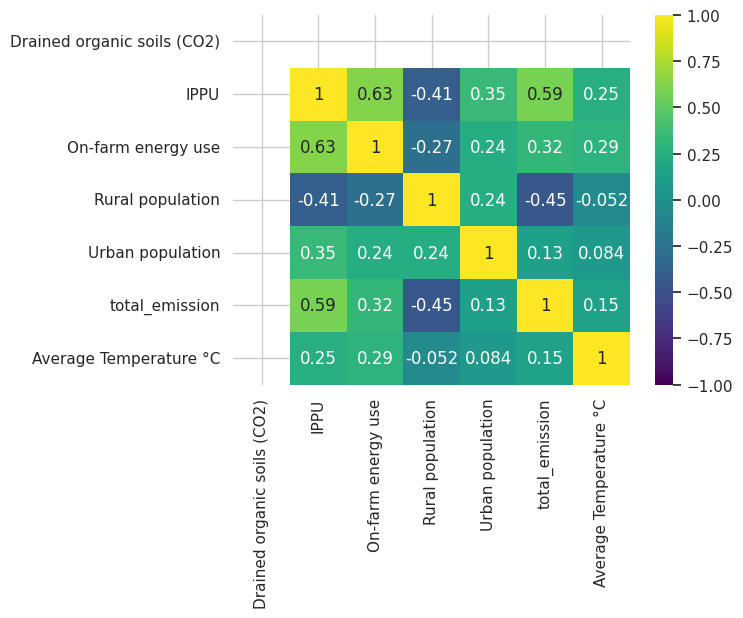

In [ ]:
sns.heatmap(Korelasi, annot=True,cmap= "viridis", vmin=-1,vmax=1)

In [ ]:
Target_Korelasi = co2_df.corr()['Average Temperature °C'].sort_values(ascending=False)
Target_Korelasi

Average Temperature °C             1.000000
Year                               0.568889
Food Transport                     0.415209
On-farm energy use                 0.292872
Fertilizers Manufacturing          0.266324
IPPU                               0.250898
Food Packaging                     0.210499
Manure Management                  0.176587
Manure applied to Soils            0.175378
On-farm Electricity Use            0.169164
Manure left on Pasture             0.166985
total_emission                     0.149381
Food Household Consumption         0.119098
Urban population                   0.084199
Crop Residues                      0.084097
Net Forest conversion              0.067303
Food Retail                        0.062829
Pesticides Manufacturing           0.061297
Forestland                         0.034680
Food Processing                    0.033749
Savanna fires                      0.014798
Forest fires                       0.001771
Total Population - Male         

In [ ]:
co2_df.columns

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C'],
      dtype='object')

In [ ]:
threshold = 0.01
Kolom = Target_Korelasi[abs(Target_Korelasi)<=threshold].index
co2_df1 = co2_df.drop(columns=Kolom)

In [ ]:
co2_df1

,Area,Year,Savanna fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
97,American Samoa,1994,0.0,998.706309,926.342278,0.0,11.481085,16.2396,-58.8991,7.9612,0.5104,7.9598,17.004663,77.393651,1.8635,88.230200,2005.792129,19991.498031,923.225603,2148.251693,2263.344946,0.0,0.0,38.6828,8037.0,43766.0,26750.0,25539.0,5288.813899,0.167917
98,American Samoa,1995,0.0,998.706309,926.342278,0.0,11.481085,15.5796,-58.8991,7.9612,0.5104,7.4803,17.004663,77.393651,1.9014,82.476200,2005.792129,19991.498031,923.225603,2148.251693,2263.344946,0.0,0.0,36.2348,7782.0,45086.0,27298.0,26103.0,5279.510299,0.770000
99,American Samoa,1996,0.0,998.706309,926.342278,0.0,11.481085,15.5340,-58.8991,7.9612,0.5104,7.3365,17.004663,77.393651,1.9389,81.517100,2005.792129,19991.498031,923.225603,2148.251693,2263.344946,0.0,0.0,35.8632,7527.0,46402.0,27837.0,26663.0,5278.027699,0.809417
100,American Samoa,1997,0.0,998.706309,926.342278,0.0,11.481085,15.7413,-58.8991,7.9612,0.5104,7.5763,17.004663,77.393651,1.9754,84.074600,2005.792129,19991.498031,923.225603,2148.251693,2263.344946,0.0,0.0,36.9279,7268.0,47673.0,28368.0,27209.0,5282.133499,0.353000
101,American Samoa,1998,0.0,998.706309,926.342278,0.0,11.481085,15.6022,-58.8991,7.9612,0.5104,7.4324,17.004663,77.393651,2.0094,82.795700,2005.792129,19991.498031,923.225603,2148.251693,2263.344946,0.0,0.0,36.5827,7006.0,48895.0,28874.0,27730.0,5280.260399,0.892000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6433,Tuvalu,2016,0.0,998.706309,2005.210414,0.0,11.481085,0.3171,-0.1997,0.0000,0.3859,0.3764,17.004663,67.631366,3.6349,209.587728,860.092165,0.091800,0.645900,0.006500,6.158300,0.0,0.0,0.3919,4367.0,6730.0,5609.0,5244.0,3182.816421,0.939818
6434,Tuvalu,2017,0.0,998.706309,2005.210414,0.0,11.481085,0.3265,-0.1997,0.0000,0.3769,0.3693,17.004663,67.631366,5.2512,209.587728,860.092165,0.097200,0.646700,0.006400,6.189900,0.0,0.0,0.4162,4306.0,6886.0,5598.0,5230.0,3184.488021,1.008500
6435,Tuvalu,2018,0.0,998.706309,2004.946254,0.0,11.481085,0.3477,-0.1997,0.0000,0.3721,0.3623,17.004663,67.631366,6.8677,209.587728,860.092165,0.102700,0.650300,0.006500,6.209400,0.0,0.0,0.4806,4245.0,7042.0,5613.0,5252.0,3185.942860,0.988500
6436,Tuvalu,2019,0.0,998.706309,2004.946254,0.0,11.481085,0.3518,-0.1997,0.0000,0.3727,0.3625,17.004663,67.631366,8.4825,209.587728,860.092165,0.096400,0.654800,0.006600,6.238900,0.0,0.0,0.4745,4191.0,7202.0,5654.0,5301.0,3187.584260,1.074333


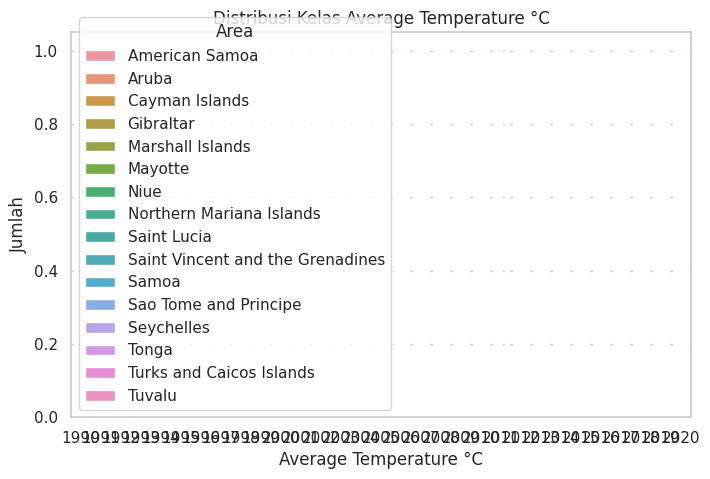

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=co2_df, x='Year', hue='Area')
plt.title('Distribusi Kelas Average Temperature °C')
plt.xlabel('Average Temperature °C')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
X = co2_df1.drop('Area', axis=1)
y = co2_df1['Area']

In [ ]:
data_scaler= StandardScaler()
X_scaled= data_scaler.fit_transform(X)
X= pd.DataFrame(X_scaled,columns=X.columns)

In [ ]:
X

,Year,Savanna fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,-1.310174,-0.092479,0.323354,-0.825857,0.0,0.57122,0.585603,-1.111366,-0.209423,-0.551734,-0.334254,0.505319,1.116635,-0.809830,-1.388438,1.070468,1.559913,1.034572,0.978126,1.034457,0.0,0.0,3.218814,-0.699127,0.287759,-0.444387,-0.482132,0.421664,-1.570907
1,-1.193260,-0.092479,0.323354,-0.825857,0.0,0.57122,0.512743,-1.111366,-0.209423,-0.551734,-0.357237,0.505319,1.116635,-0.808669,-1.427898,1.070468,1.559913,1.034572,0.978126,1.034457,0.0,0.0,2.952442,-0.704758,0.350573,-0.425053,-0.462131,0.417224,0.085485
2,-1.076346,-0.092479,0.323354,-0.825857,0.0,0.57122,0.507709,-1.111366,-0.209423,-0.551734,-0.364129,0.505319,1.116635,-0.807521,-1.434475,1.070468,1.559913,1.034572,0.978126,1.034457,0.0,0.0,2.912008,-0.710389,0.413197,-0.406037,-0.442272,0.416517,0.193924
3,-0.959432,-0.092479,0.323354,-0.825857,0.0,0.57122,0.530594,-1.111366,-0.209423,-0.551734,-0.352635,0.505319,1.116635,-0.806404,-1.416936,1.070468,1.559913,1.034572,0.978126,1.034457,0.0,0.0,3.027860,-0.716109,0.473680,-0.387303,-0.422909,0.418476,-1.061724
4,-0.842518,-0.092479,0.323354,-0.825857,0.0,0.57122,0.515238,-1.111366,-0.209423,-0.551734,-0.359532,0.505319,1.116635,-0.805363,-1.425707,1.070468,1.559913,1.034572,0.978126,1.034457,0.0,0.0,2.990298,-0.721895,0.531830,-0.369451,-0.404433,0.417582,0.421119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,1.261933,-0.092479,0.323354,0.834619,0.0,0.57122,-1.172135,0.379895,-0.411943,-0.562822,-0.697729,0.505319,-0.671674,-0.755598,-0.556188,-0.969390,-0.641679,-0.969518,-0.970209,-0.973819,0.0,0.0,-0.947692,-0.780172,-1.474658,-1.190251,-1.201855,-0.583305,0.552672
408,1.378847,-0.092479,0.323354,0.834619,0.0,0.57122,-1.171097,0.379895,-0.411943,-0.563624,-0.698069,0.505319,-0.671674,-0.706114,-0.556188,-0.969390,-0.641679,-0.969516,-0.970209,-0.973791,0.0,0.0,-0.945048,-0.781520,-1.467235,-1.190639,-1.202352,-0.582507,0.741623
409,1.495761,-0.092479,0.323354,0.834212,0.0,0.57122,-1.168757,0.379895,-0.411943,-0.564051,-0.698405,0.505319,-0.671674,-0.656624,-0.556188,-0.969390,-0.641678,-0.969508,-0.970209,-0.973773,0.0,0.0,-0.938041,-0.782867,-1.459811,-1.190110,-1.201571,-0.581813,0.686601
410,1.612675,-0.092479,0.323354,0.834212,0.0,0.57122,-1.168304,0.379895,-0.411943,-0.563998,-0.698395,0.505319,-0.671674,-0.607186,-0.556188,-0.969390,-0.641679,-0.969499,-0.970209,-0.973747,0.0,0.0,-0.938705,-0.784059,-1.452197,-1.188664,-1.199834,-0.581029,0.922737


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pip install imbalanced-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn import set_config
from sklearn.compose import ColumnTransformer
set_config(display="diagram")

In [ ]:
SEED = 42
TARGET = 'Average Temperature °C'
FEATURES = co2_df.columns.drop(TARGET)

NUMERICAL = co2_df[FEATURES].select_dtypes('number').columns
print(f"Numerical features: {', '.join(NUMERICAL)}")


Numerical features: Year, Savanna fires, Forest fires, Crop Residues, Rice Cultivation, Drained organic soils (CO2), Pesticides Manufacturing, Food Transport, Forestland, Net Forest conversion, Food Household Consumption, Food Retail, On-farm Electricity Use, Food Packaging, Agrifood Systems Waste Disposal, Food Processing, Fertilizers Manufacturing, IPPU, Manure applied to Soils, Manure left on Pasture, Manure Management, Fires in organic soils, Fires in humid tropical forests, On-farm energy use, Rural population, Urban population, Total Population - Male, Total Population - Female, total_emission


In [ ]:
co2_df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
97,American Samoa,1994,0.0,0.0,998.706309,926.342278,0.0,11.481085,16.2396,-58.8991,7.9612,0.5104,7.9598,17.004663,77.393651,1.8635,88.2302,2005.792129,19991.498031,923.225603,2148.251693,2263.344946,0.0,0.0,38.6828,8037.0,43766.0,26750.0,25539.0,5288.813899,0.167917
98,American Samoa,1995,0.0,0.0,998.706309,926.342278,0.0,11.481085,15.5796,-58.8991,7.9612,0.5104,7.4803,17.004663,77.393651,1.9014,82.4762,2005.792129,19991.498031,923.225603,2148.251693,2263.344946,0.0,0.0,36.2348,7782.0,45086.0,27298.0,26103.0,5279.510299,0.770000
99,American Samoa,1996,0.0,0.0,998.706309,926.342278,0.0,11.481085,15.5340,-58.8991,7.9612,0.5104,7.3365,17.004663,77.393651,1.9389,81.5171,2005.792129,19991.498031,923.225603,2148.251693,2263.344946,0.0,0.0,35.8632,7527.0,46402.0,27837.0,26663.0,5278.027699,0.809417
100,American Samoa,1997,0.0,0.0,998.706309,926.342278,0.0,11.481085,15.7413,-58.8991,7.9612,0.5104,7.5763,17.004663,77.393651,1.9754,84.0746,2005.792129,19991.498031,923.225603,2148.251693,2263.344946,0.0,0.0,36.9279,7268.0,47673.0,28368.0,27209.0,5282.133499,0.353000
101,American Samoa,1998,0.0,0.0,998.706309,926.342278,0.0,11.481085,15.6022,-58.8991,7.9612,0.5104,7.4324,17.004663,77.393651,2.0094,82.7957,2005.792129,19991.498031,923.225603,2148.251693,2263.344946,0.0,0.0,36.5827,7006.0,48895.0,28874.0,27730.0,5280.260399,0.892000


# Machine Learning Modeling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor


plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('Agrofood_co2_emission.csv')

In [ ]:
y_2020 = df.loc[df["Year"]==2020]
kt_2020 =y_2020["total_emission"].sum()
gt_2020 = round(kt_2020 / 1_000_000,2) # the amount of gigatones of CO2
perc = gt_2020 / 30
print(f"The amount of CO2 from agrifood in 2020 is {gt_2020} gigatones (gt), that is:",round(perc * 100), "%","of total emissions!")

The amount of CO2 from agrifood in 2020 is 18.42 gigatones (gt), that is: 61 % of total emissions!


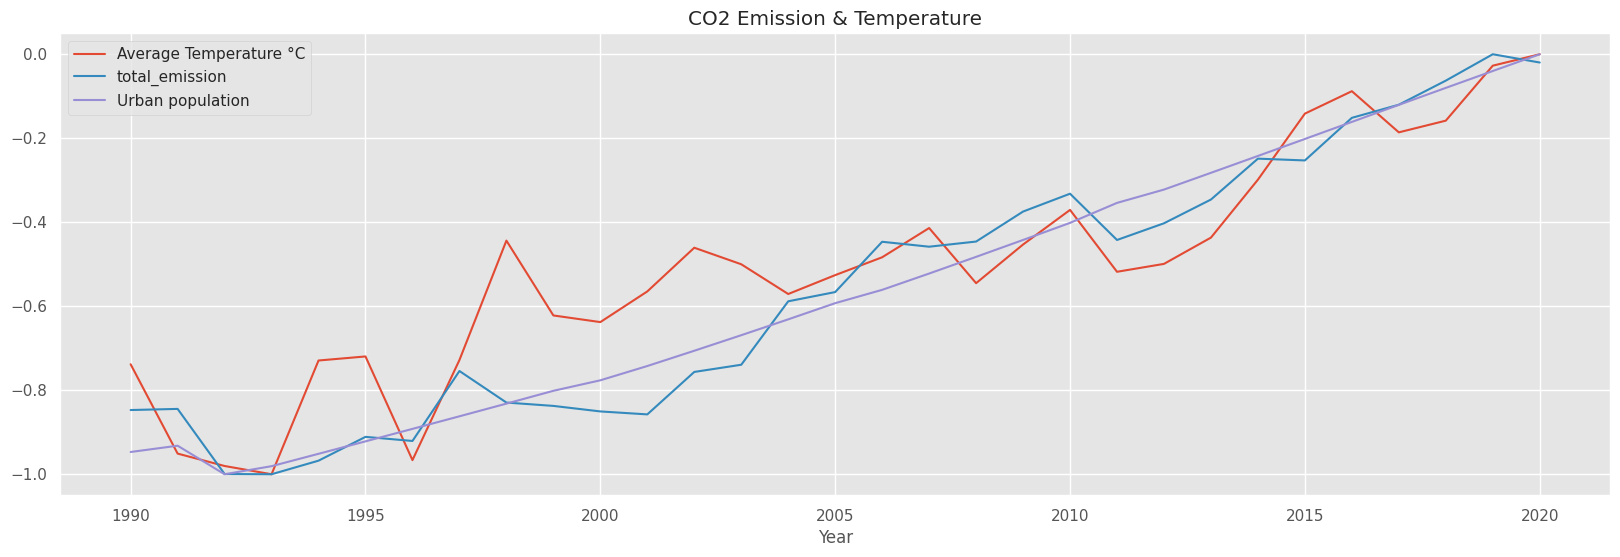

In [ ]:
def normalizer(df):
    norm = (df - df.max()) / (df.max() - df.min())
    return norm

temp_emission = df.groupby("Year").agg({"Average Temperature °C": "mean", "total_emission": "mean", "Urban population": "mean"})
norm_temp = normalizer(temp_emission)


norm_temp.plot(figsize=(20, 6))
plt.title("CO2 Emission & Temperature")
plt.show()

In [ ]:
def plot_co2_trend(nation):
    ita = df.loc[df.Area == nation]
    ita = ita.set_index("Year")
    plt.figure(figsize=(12,6))
    ita["total_emission"].plot(kind = "line", color = "green")
    plt.title(f"{nation} CO2 trend")
    plt.show()

In [ ]:
fig = px.box(df, x="Year",
             y="Average Temperature °C",
             color="Year",
             color_discrete_sequence=px.colors.sequential.Viridis,
             title='<b>Average temperature distribution by years')
fig.show()

# Apakah ada korelasi antara emisi dan suhu?
Di negara-negara dengan populasi yang signifikan, tampaknya ada korelasi yang lebih kuat antara perubahan iklim dan emisi pertanian CO2. Asia tampaknya merupakan wilayah yang memiliki korelasi yang lebih kuat antara kedua variabel tersebut.

In [ ]:
df["pop_tot"] = df["Total Population - Male"] + df["Total Population - Female"]

In [ ]:
continent_mapping = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Côte d\'Ivoire', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'São Tomé and Príncipe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'],
    'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City'],
    'North America': ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'],
    'Oceania': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'],
    'South America': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
}

#This function assign a continent label to each country in the df
def assign_continent(country):
    for continent, countries in continent_mapping.items():
        if country in countries:
            return continent
    return None

df["continent"] = df["Area"].apply(assign_continent)

In [ ]:
px.scatter(df, df["Average Temperature °C"],
           df["total_emission"],
           size= "pop_tot",
           title = "<b>CO2 Emission & Temperature - population",
           template="plotly_dark",
           color ="continent")

In [ ]:
correlation = df.groupby(["Year"]).agg({"total_emission":"sum", "Average Temperature °C":"mean", "pop_tot":"sum"})
correlation.corr()

,total_emission,Average Temperature °C,pop_tot
total_emission,1.000000,0.90552,0.981828
Average Temperature °C,0.905520,1.00000,0.912050
pop_tot,0.981828,0.91205,1.000000


In [ ]:
px.scatter(correlation.reset_index(),
    x = "total_emission",
    y = "Average Temperature °C",
    size = "pop_tot",
    color = "Year",
    title = "<br> Temperature & CO2 Emissions - global relation",
    template="plotly_dark")

In [ ]:
fig = px.scatter_3d(df.groupby(["continent","Year"])\
                    .agg({"total_emission":"sum",
                          "Average Temperature °C":"mean",
                          "pop_tot":"sum"}).reset_index(),
                          z = "total_emission",
                          y = "Average Temperature °C",
                          x = "Year",
                          color="continent",
                          size = "pop_tot",
                           title = "<br> Temperature & CO2 Emissions - per Continent and Year")
fig.show()

In [ ]:
!pip install pycountry

In [ ]:
import pycountry
# we need a iso for plotting the emission around the globe
def get_iso_alpha(country_name):
    try:
        country = pycountry.countries.get(name=country_name)
        iso_alpha = country.alpha_3
        return iso_alpha
    except:
        return None

def plot_global(df, year):
    year_df = df.loc[df["Year"] == year].copy()
    year_df["iso_alpha"] = year_df["Area"].apply(get_iso_alpha)

    # Normalize the emission in range 0-100 becouse of neg values non plottable
    year_df["total_emission_norm"] = (year_df["total_emission"] - year_df["total_emission"].min()) / (year_df["total_emission"].max() - year_df["total_emission"].min()) * 100

    fig = px.scatter_geo(year_df, locations="iso_alpha",
                        color="continent",
                        hover_name="Area",
                        size="total_emission_norm"
                        )

    fig.update_layout(title={'text': f"<br> Agrifood CO2 emission by {year}", 'x': 0.455, 'xanchor': 'center'})
    fig.update_layout(
    title={'text': f"<br> Agrifood CO2 emission by {year}", 'x': 0.5, 'xanchor': 'center'},
    autosize=False,
    height=600,
    width=1200
)

    fig.show()

plot_global(df, year=2020)

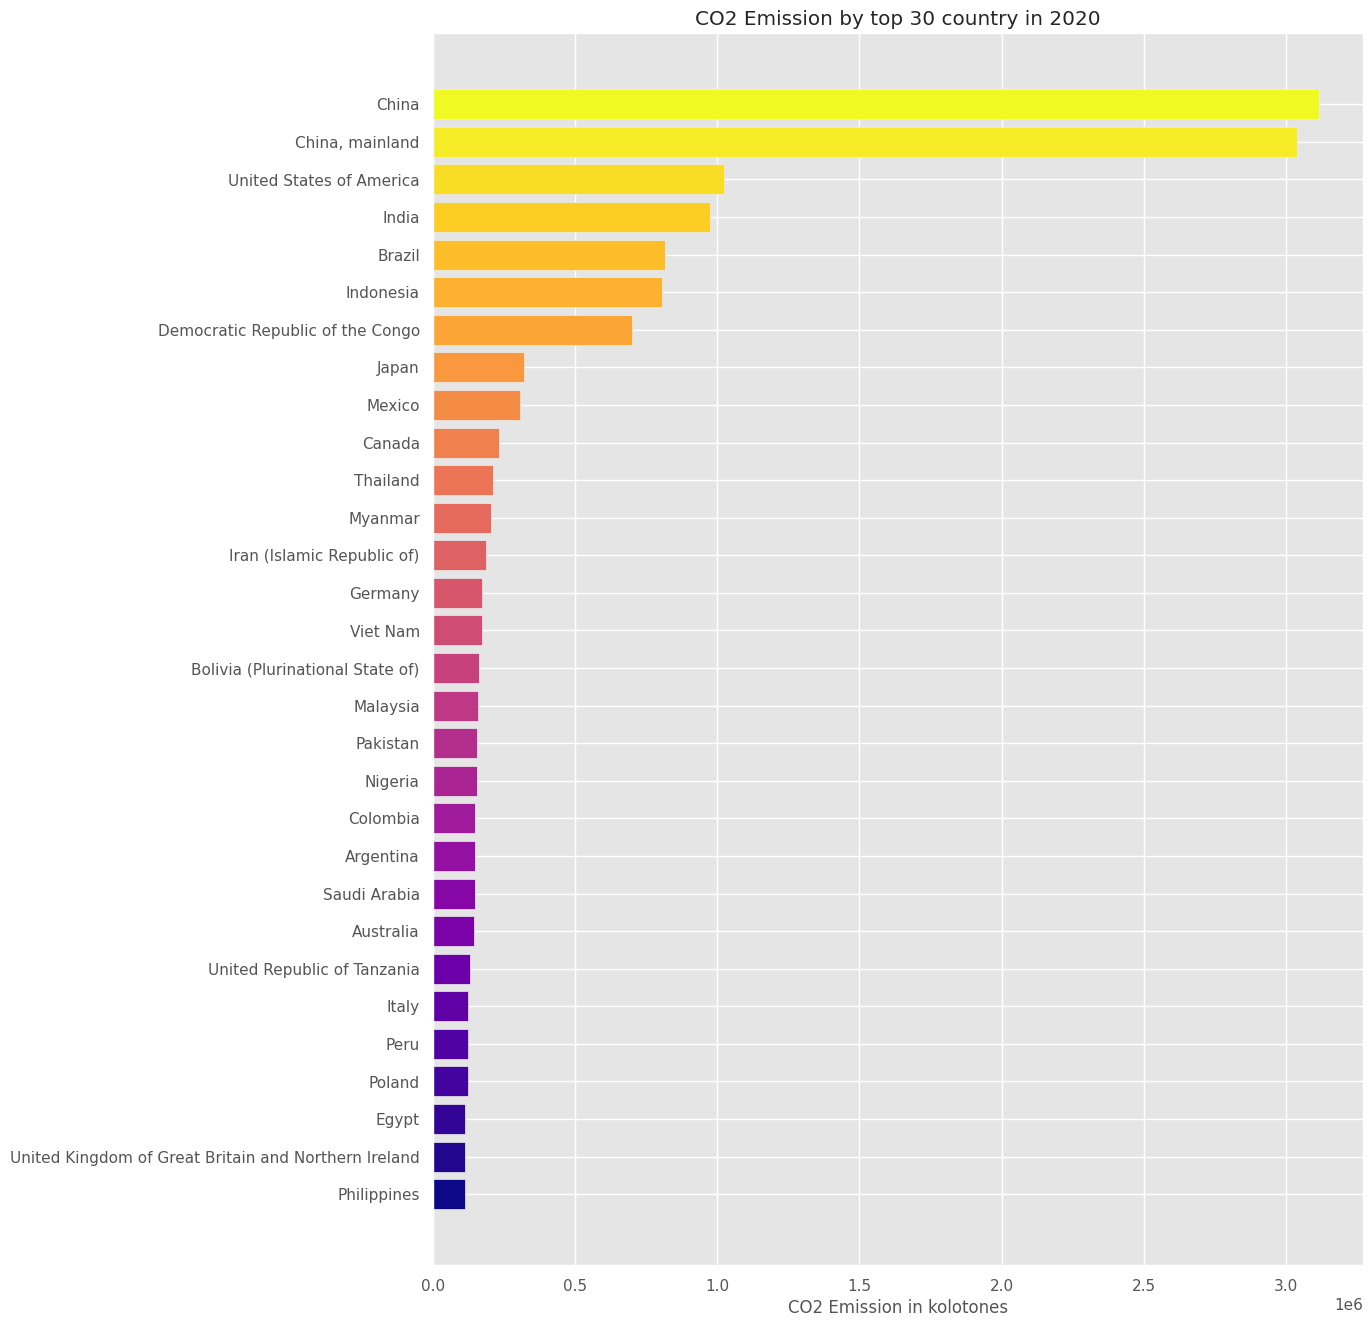

In [ ]:
def country_emission(df,year, length = 30):
        df = df.copy()
        plot = df.loc[df["Year"]==year]
        plot = plot.sort_values(by = "total_emission", ascending = True).tail(length)
        colors = plt.cm.get_cmap('plasma', len(plot))
        plt.figure(figsize=(12, 16))
        plt.barh(plot['Area'],
                plot['total_emission'],
                color=colors(range(len(plot))))
        plt.title(f'CO2 Emission by top {length} country in {year}')
        plt.xlabel('CO2 Emission in kolotones')

        plt.show()

country_emission(df, year=2020)

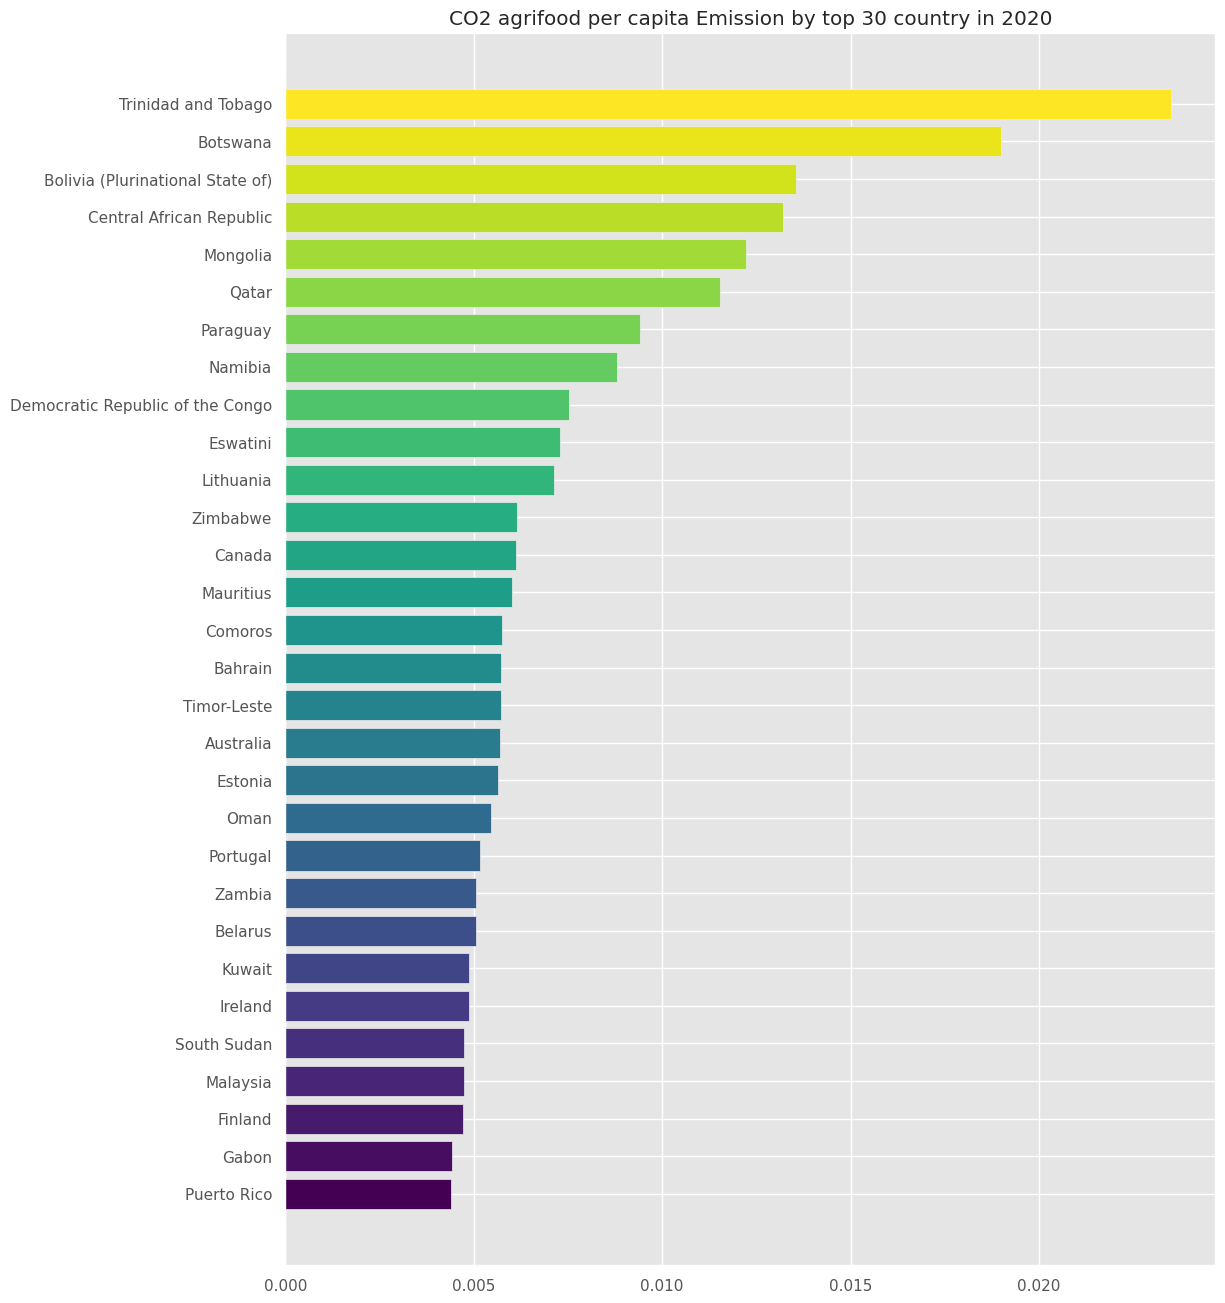

In [ ]:
df["per_capita_emission_kt"] = df["total_emission"] / df["pop_tot"]

def percapita_emission(df,year, length = 30):
        df = df.copy()
        # let's remove small island or counties ehit this filter
        plot = df.loc[(df["Year"]==year) & (df["pop_tot"] > 800000)]
        plot = plot.sort_values(by = "per_capita_emission_kt", ascending = True).tail(length)
        colors = plt.cm.get_cmap('viridis', len(plot))
        plt.figure(figsize=(12, 16))
        plt.barh(plot['Area'],
                plot['per_capita_emission_kt'],
                color=colors(range(len(plot))))
        plt.title(f'CO2 agrifood per capita Emission by top {length} country in {year}')
        plt.show()

percapita_emission(df, year=2020, length=30)

# Insights
Seperti yang kita lihat dalam analisis data eksplorasi ini:

Asia adalah benua dengan emisi CO2 tertinggi.
Namun, emisi besar Asia berkorelasi kuat dengan jumlah penduduknya yang besar. Faktanya, Oseania, diikuti oleh Amerika, memiliki emisi per kapita tertinggi.
Mengenai suhu, khususnya peningkatan rata-rata tahunan dalam Celcius, Eropa tampaknya merupakan benua yang paling terpengaruh oleh perubahan iklim, seperti yang terlihat pada grafik di bawah ini.

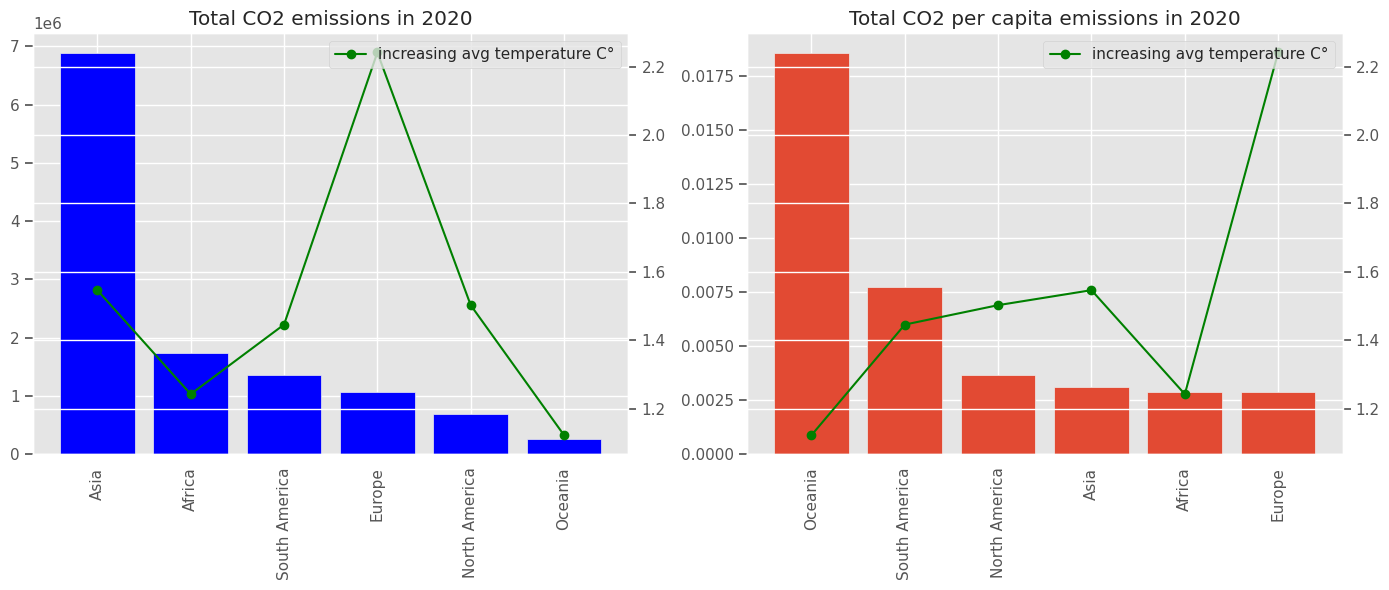

In [ ]:
def continental_emission(year =2020):
    continent_df = df.loc[(df.pop_tot > 500000) & (df.Year == year)]\
        .groupby("continent")\
        .agg({"total_emission":"sum",
            "Average Temperature °C":"median",
            "per_capita_emission_kt":"mean"}).reset_index()
    continent_df = continent_df.sort_values(by="total_emission", ascending=False)
    colors = plt.cm.get_cmap('viridis', len(continent_df))

    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    ax[0].bar(continent_df["continent"], continent_df.total_emission, color="blue")
    ax[0].set_title(f"Total CO2 emissions in {year}")

    ax2 = ax[0].twinx()
    ax2.plot(continent_df["continent"], continent_df["Average Temperature °C"], color='green', marker='o')
    ax2.legend(["increasing avg temperature C°"], loc='upper right')


    continent_df = continent_df.sort_values(by="per_capita_emission_kt", ascending=False)
    ax[1].bar(continent_df["continent"], continent_df["per_capita_emission_kt"])
    ax[1].set_title(f"Total CO2 per capita emissions in {year}")
    ax3 = ax[1].twinx()
    ax3.plot(continent_df["continent"], continent_df["Average Temperature °C"], color='green', marker='o')
    ax3.legend(["increasing avg temperature C°"], loc='upper right')

    for axis in ax:
        axis.set_xticklabels(axis.get_xticklabels(), rotation='vertical')

    plt.tight_layout()
    plt.show()

continental_emission(year =2020)

Mari kita lihat beberapa hubungan antara vars (sampel) dan target (suhu rata-rata)

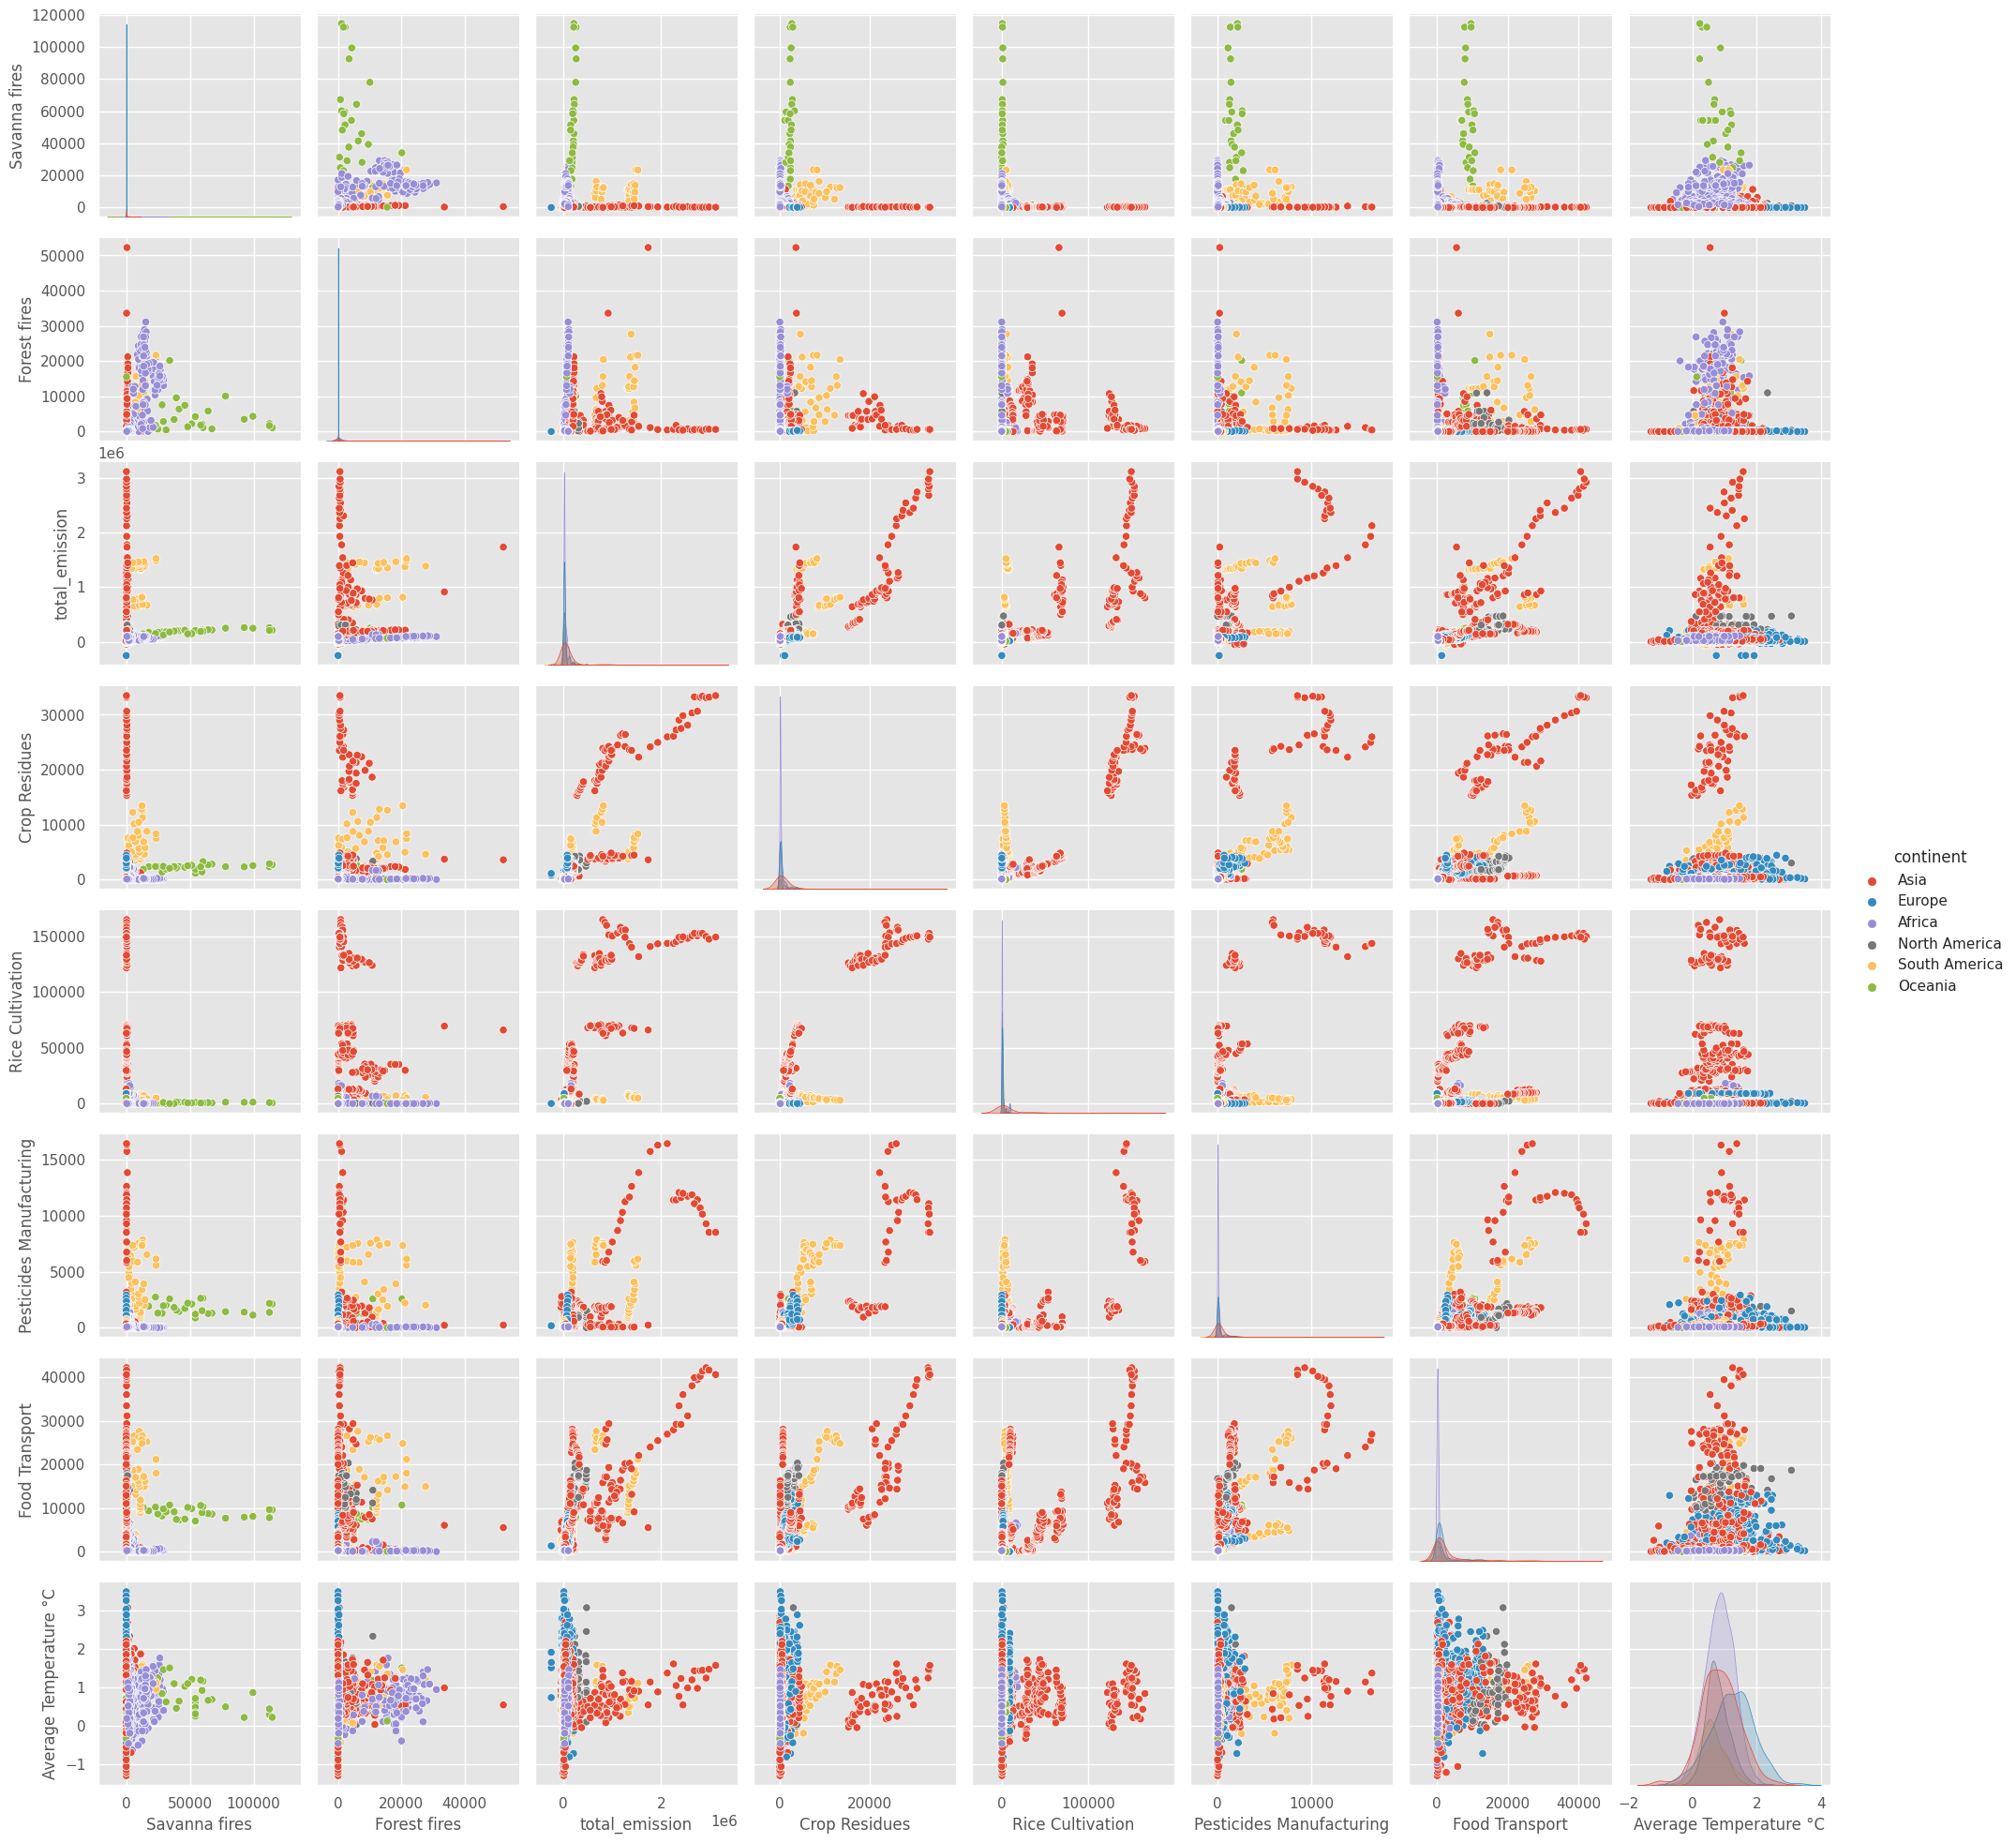

In [ ]:
sns.pairplot(df, vars =[
     'Savanna fires', 'Forest fires',
     "total_emission", 'Crop Residues',
     'Rice Cultivation','Pesticides Manufacturing',
     'Food Transport',"Average Temperature °C"
],
y_vars="Average Temperature °C",
hue = "continent")
plt.show()

# Mempersiapkan data untuk evaluasi model
Pada tahap ini, kami melakukan preprocessing data untuk memahami hubungan antara berbagai variabel yang terkait dengan emisi CO2 di sektor agrikultur dan peningkatan suhu, yang akan menjadi target kami.

# Mengganti nilai yang hilang dengan teknik regresi:

Mari mengganti nilai yang hilang dengan prediksi RandomForest

Mari mengkodekan angka kategorikal

Mari memplot informasi timbal balik

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
df.isna().sum().sort_values(ascending=False)

continent                          1743
Crop Residues                      1389
On-farm energy use                  956
Manure applied to Soils             928
Manure Management                   928
IPPU                                743
Net Forest conversion               493
Forestland                          493
Food Household Consumption          473
Fires in humid tropical forests     155
Forest fires                         93
Savanna fires                        31
Urban population                      0
Rural population                      0
Area                                  0
Total Population - Male               0
Total Population - Female             0
total_emission                        0
Average Temperature °C                0
pop_tot                               0
Fires in organic soils                0
Fertilizers Manufacturing             0
Manure left on Pasture                0
Year                                  0
Food Processing                       0


In [ ]:
def regressor_imputer(df, feature, max_depth = 6):
    """ This function replace missing values with
        RanfomForestRegressor forecasting """

    df_filled = df.copy()

    if df_filled[feature].isna().any():
        missing_data = df_filled[df_filled[feature].isna()]
        non_missing_data = df_filled.dropna(subset=[feature])

        X_train = non_missing_data.drop(columns=[feature])
        y_train = non_missing_data[feature]

        imputer = SimpleImputer()
        X_train_imputed = imputer.fit_transform(X_train)
        X_missing = missing_data.drop(columns=[feature])
        X_missing_imputed = imputer.transform(X_missing)

        rf = RandomForestRegressor(max_depth = max_depth)
        rf.fit(X_train_imputed, y_train)

        y_missing_pred = rf.predict(X_missing_imputed)

        df_filled.loc[df_filled[feature].isna(), feature] = y_missing_pred

    return df_filled

In [ ]:
num_features = [col for col in df.columns if df[col].dtypes in ["int64", "float64"]]
cat_features = [col for col in df.columns if df[col].dtypes in ["object"]]
# let's create a list with onli missing values feature and the replace them with regression
missing_values = df[num_features].isna().sum()
missing_list=missing_values[missing_values > 0].keys().tolist()

In [ ]:
numeric_only = df[num_features ]
def replace_missing(df, missing_list):
    numeric_df = df.copy()
    for feature in tqdm(missing_list):
        numeric_df = regressor_imputer(numeric_df, feature)
    return numeric_df

num_df = replace_missing(numeric_only, missing_list)

  0%|          | 0/11 [00:00<?, ?it/s]

In [ ]:
cat_df = df[cat_features].copy()

label_encoder = LabelEncoder()
for column in cat_df.columns:
    cat_df.loc[:, column] = label_encoder.fit_transform(cat_df[column])

In [ ]:
final_df = pd.concat([cat_df,num_df], axis =1)
X = final_df.drop(columns =["Average Temperature °C","per_capita_emission_kt"])
y =final_df["Average Temperature °C"]

# Model Evaluation`
Untuk tujuan demonstrasi, pada tahap terakhir dari penelitian ini, kami menjalankan model regresi untuk menunjukkan bagaimana suhu berfluktuasi sebagai respons terhadap perubahan emisi, dengan memplotkan fitur-fitur yang penting untuk regressor terbaik.

In [ ]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
final_df = pd.concat([cat_df,num_df], axis =1)

def df_split(final_df, year = 2016):
    final_df =final_df.copy()
    x_train = final_df.loc[final_df.Year < year]
    y_train = x_train["Average Temperature °C"]
    x_train = x_train.drop(columns ="Average Temperature °C")

    x_test =final_df.loc[final_df.Year >= year]
    y_test =x_test["Average Temperature °C"]
    x_test = x_test.drop(columns ="Average Temperature °C")
    return x_train,y_train,x_test,y_test

In [ ]:
x_train,y_train,x_test,y_test = df_split(final_df)

In [ ]:
def model_evaluation(x_train,x_test,y_train,y_test):
    models = {

        "LGBMRegressor":LGBMRegressor(),
        "KNeighborsRegressor" : KNeighborsRegressor(),
        "RandomForestRegressor": RandomForestRegressor(),
        "GradientBoostingRegressor": GradientBoostingRegressor(),
        "BaggingRegressor":BaggingRegressor(),
        "XGBRegressor": XGBRegressor()
    }

    for model_name, model in models.items():
        model.fit(x_train, y_train)
        test_pred = model.predict(x_test)
        folds = KFold(n_splits=5)

        mae = mean_absolute_error(y_test, test_pred)
        mse = mean_squared_error(y_test, test_pred)
        cv_score=cross_val_score(model,x_train,y_train,cv=folds, scoring = "neg_mean_absolute_error")
        cv_score = np.mean(cv_score)

        print(model_name)
        print("MAE:", round(mae, 4))
        print("MSE:", round(mse, 4))
        print("Cross_val_score", cv_score)
        print("------------"*3)

model_evaluation(x_train,x_test,y_train,y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7678
[LightGBM] [Info] Number of data points in the train set: 5830, number of used features: 33
[LightGBM] [Info] Start training from score 0.772622
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7632
[LightGBM] [Info] Number of data points in the train set: 4664, number of used features: 33
[LightGBM] [Info] Start training from score 0.773985
[LightGBM] [Warning] Found whi

In [ ]:
df.to_csv('data_akhir_Agrofood_co2_emisi.csv')

In [ ]:
reg =  RandomForestRegressor()
reg.fit(x_train,y_train)

RandomForestRegressor()

<Figure size 1200x500 with 0 Axes>

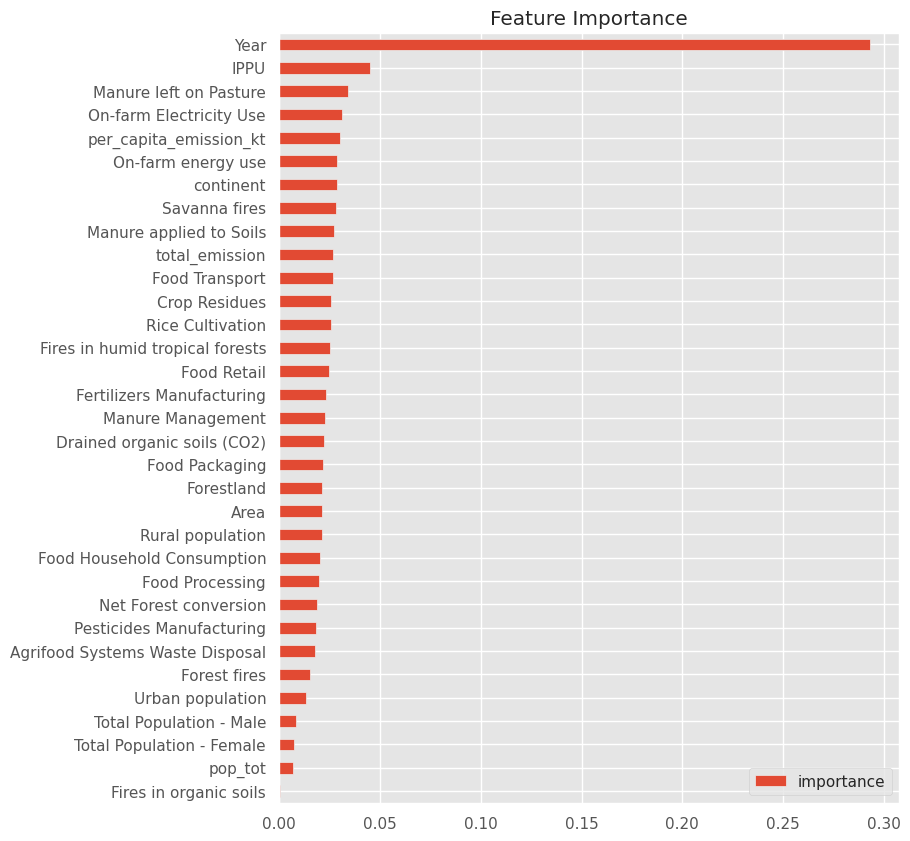

In [ ]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
plt.figure(figsize = (12,5))
fi.sort_values('importance').plot(kind='barh', title='Feature Importance', figsize =(8,10))
plt.show()

In [ ]:
df.isna().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956
